In [174]:
# a szükséges könyvtárak importálása

import os
import sys
import IPython

import numpy as np
import pandas as pd

import time
import datetime

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.core.display import HTML
from scipy.stats import linregress

import seaborn as sns
# seaborn maszkolás
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)]=True

import missingno as msgno

import matplotlib
import matplotlib.pyplot as plt
# egyedi figure size
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# általános figure size
width = 20
height = 20

plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams.update({'font.size': 38})

#from chart_studio import plotly


%matplotlib inline
import statsmodels
#import cufflinks as cf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from pandas.plotting import autocorrelation_plot

#import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#plotly.offline.init_notebook_mode()
#init_notebook_mode(connected=True)
#cf.go_offline()


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


print("Jupyter notebook: {}" .format(IPython.__version__))
print("Python: {}" .format(sys.version))
print("Numpy: {}" .format(np.__version__))
print("Pandas: {}" .format(pd.__version__))
print("Matplotlib: {}" .format(matplotlib.__version__))
print("Seaborn: {}" .format(sns.__version__))
print("sklearn: {}" .format(sklearn.__version__))
print("statsmodels: {}" .format(statsmodels.__version__))
#print("Plotly version: {}".format(plotly.__version__))

Jupyter notebook: 7.12.0
Python: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.18.1
Pandas: 1.0.1
Matplotlib: 3.1.2
Seaborn: 0.10.0
sklearn: 0.22.1
statsmodels: 0.11.0


## Importing the dataset ##

In [2]:
os.chdir("c:\\Lori\\Suil\\DA_3\\Vizsga")
df = pd.read_csv("train.csv")

## Exploratory data analysis ##

In [4]:
df.shape

(27752, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27752 entries, 0 to 27751
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 27752 non-null  int64  
 1   n_tokens_content               27752 non-null  int64  
 2   n_unique_tokens                27752 non-null  float64
 3   n_non_stop_words               27752 non-null  float64
 4   n_non_stop_unique_tokens       27752 non-null  float64
 5   num_hrefs                      27752 non-null  int64  
 6   num_self_hrefs                 27752 non-null  int64  
 7   num_imgs                       27752 non-null  int64  
 8   num_videos                     27752 non-null  int64  
 9   average_token_length           27752 non-null  float64
 10  num_keywords                   27752 non-null  int64  
 11  data_channel_is_lifestyle      27752 non-null  int64  
 12  data_channel_is_entertainment  27752 non-null 

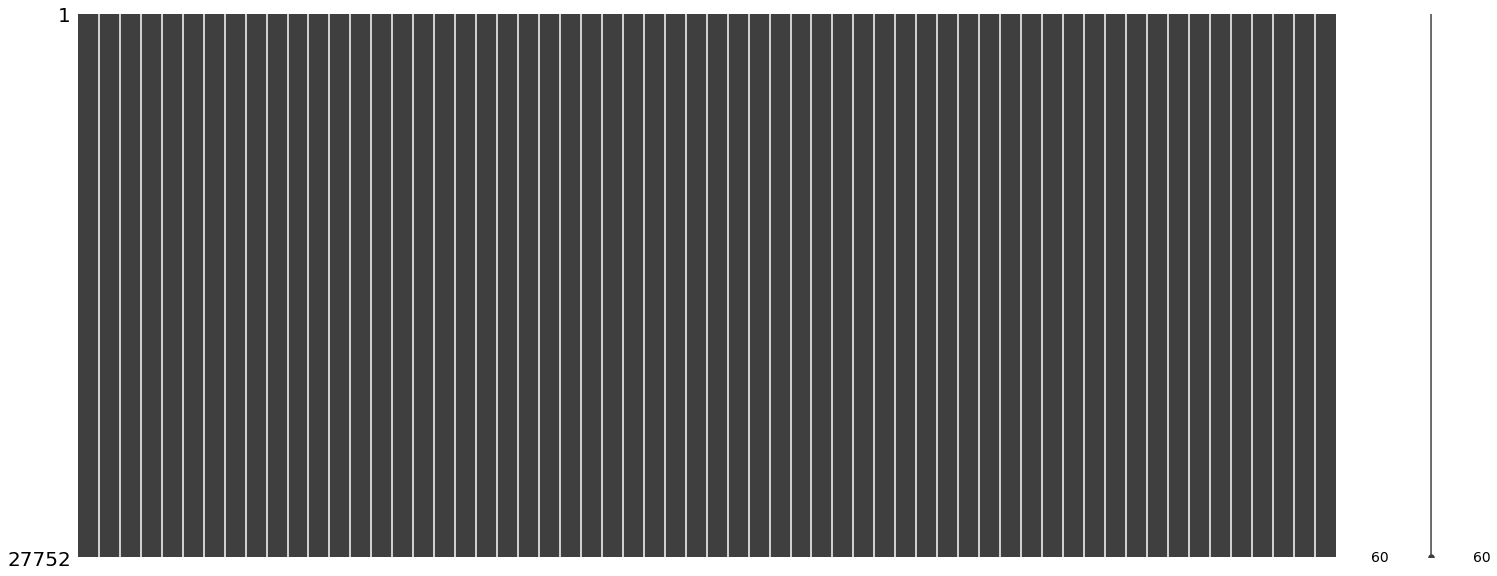

In [6]:
msgno.matrix(df)

In [8]:
df.isnull().sum().sum()

0

The dataset has 59 attributes (as numerical values) describing different aspects of each article, from a total of 27752 articles published from Mashable website. There are no missing values in the dataset.

As first step I categorized the dataset in different categories based on the feature relevance. As a result I came up with 6+1 categories, the final category beeing the target label (is the article popular or not).


In [20]:
words = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',\
         'n_non_stop_words', 'n_non_stop_unique_tokens','average_token_length']

links = ['num_hrefs','num_self_hrefs','self_reference_min_shares', 'self_reference_max_shares',\
         'self_reference_avg_sharess']

digital_media = ['num_imgs', 'num_videos']

time = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',\
           'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',\
           'is_weekend']

keywords = ['num_keywords','data_channel_is_lifestyle', 'data_channel_is_entertainment', \
               'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech',\
                'data_channel_is_world','kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', \
               'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg']

nlp = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',\
        'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', \
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', \
       'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity',\
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',\
       'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']

y= ['is_popular']

Let's have a look ath the categories I choose and their features:

In [21]:
cat_dic = {"words": words, "links":links, "digital media":digital_media, "time": time, "keywords":keywords, \
           "natural language processing":nlp}

In [24]:
for key, value in cat_dic.items():
    print("In the category {} belong the following features:".format(key))
    for feature in value:
        print(feature)
    print('\n')

In the category words belong the following features:
n_tokens_title
n_tokens_content
n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
average_token_length


In the category links belong the following features:
num_hrefs
num_self_hrefs
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess


In the category digital media belong the following features:
num_imgs
num_videos


In the category time belong the following features:
weekday_is_monday
weekday_is_tuesday
weekday_is_wednesday
weekday_is_thursday
weekday_is_friday
weekday_is_saturday
weekday_is_sunday
is_weekend


In the category keywords belong the following features:
num_keywords
data_channel_is_lifestyle
data_channel_is_entertainment
data_channel_is_bus
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
kw_min_min
kw_max_min
kw_avg_min
kw_min_max
kw_max_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg


In the category natural language processing belong the following features:
LDA_00

In [25]:
words = df[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',\
         'n_non_stop_words', 'n_non_stop_unique_tokens','average_token_length']]

links = df[['num_hrefs','num_self_hrefs','self_reference_min_shares', 'self_reference_max_shares',\
         'self_reference_avg_sharess']]

digital_media = df[['num_imgs', 'num_videos']]

time = df[['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',\
           'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',\
           'is_weekend']]

keywords = df[['num_keywords','data_channel_is_lifestyle', 'data_channel_is_entertainment', \
               'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech',\
                'data_channel_is_world','kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', \
               'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg']]

nlp = df[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',\
        'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', \
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', \
       'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity',\
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',\
       'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']]

y= df['is_popular']

Let's first see if there is any information on the popularity and the number of words in the content and title:

Text(0, 0.5, 'Average number of words in content')

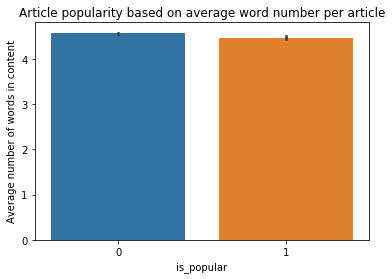

In [64]:
sns.barplot("is_popular", "average_token_length",data=df)
plt.title("Article popularity based on average word number per article")
plt.ylabel("Average number of words in content")

Text(0, 0.5, 'Average number of words in content')

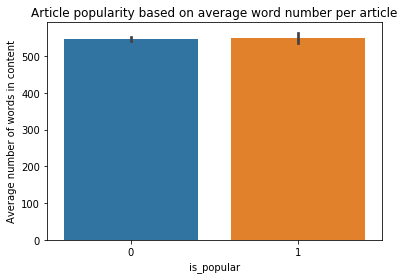

In [38]:
sns.barplot("is_popular", "n_tokens_content",data=df)
plt.title("Article popularity based on average word number per article")
plt.ylabel("Average number of words in content")


Text(0, 0.5, 'Average number of words in title')

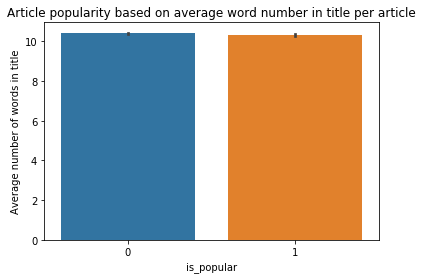

In [39]:
sns.barplot("is_popular", "n_tokens_title",data=df)
plt.title("Article popularity based on average word number in title per article")
plt.ylabel("Average number of words in title")

As we can see it seems that the number of words in the content and the title seems very similar. 

Let's have a look now at the correlation matrix of the words category to see how correlated the features in this group are.

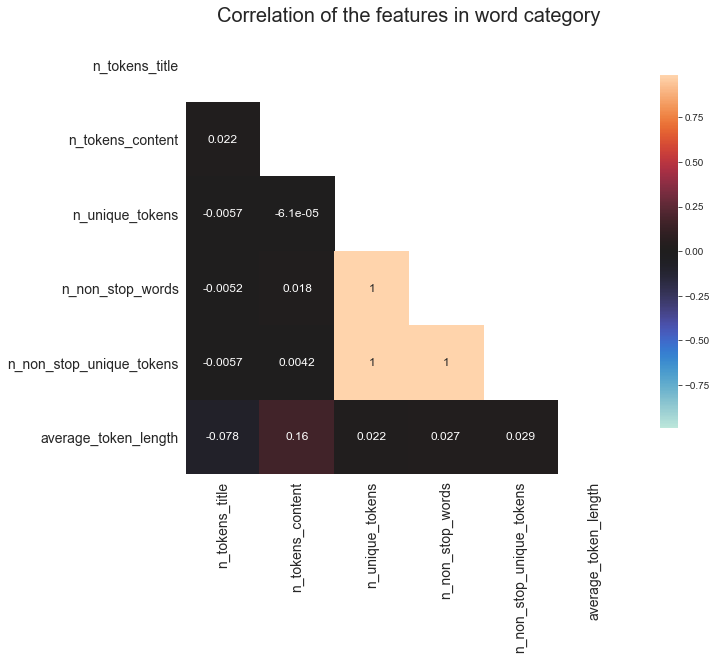

In [66]:
corr =words.corr() 

plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

#korrelációs mátrix megjelenítése
sns.set_style(style="white")
#sns.heatmap(corr, mask=mask, vmax =.99, vmin = -.99, center = 0, square=True, annot=True, annot_kws={"size": 12})
sns.heatmap(corr, mask=mask, vmax =.99, vmin = -.99, center = 0, square=True, annot=True, annot_kws={"size": 12},\
            cbar_kws={"shrink": 0.65})
plt.title("Correlation of the features in word category", fontsize=20)
#plt.xlabel("Paraméterek", fontsize=20)
#plt.ylabel("Paraméterek", fontsize=20)
plt.tick_params(labelsize=14)
plt.show()

As we can see the number of non stop words is fully correlated with the number of unique tokens and the number of non stop unique words, so we can get rid of these values.

Let's have a look now if there is any difference in terms of links.

Text(0, 0.5, 'Average number of words in title')

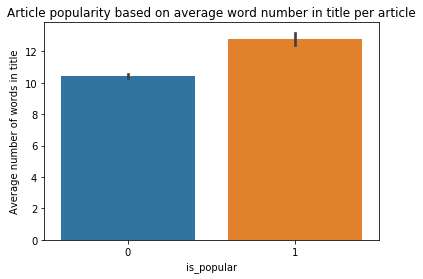

In [40]:
sns.barplot("is_popular", "num_hrefs",data=df)
plt.title("Article popularity based on number of links per article")
plt.ylabel("Average number of links per article")

Text(0, 0.5, 'Average number of links to other mashable articles')

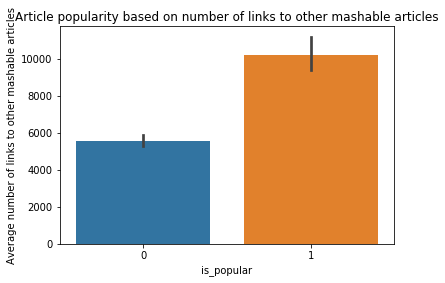

In [51]:
sns.barplot("is_popular", "self_reference_avg_sharess",data=df)
plt.title("Article popularity based on number of links to other mashable articles")
plt.ylabel("Average number of links to other mashable articles")

As we can see in the graphs above we can definitely conclude that the higher the number of links and links to other mashable articles the higher the probability that the article will be popular.

Let's have a look now at the correlation matrix of the links category to see how correlated the features in this group are.

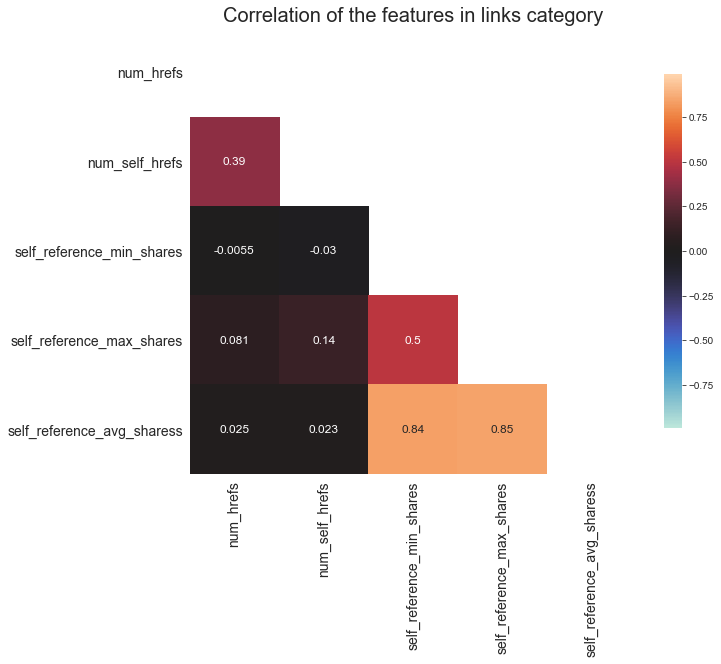

In [104]:
corr =links.corr() 

plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

#korrelációs mátrix megjelenítése
sns.set_style(style="white")
#sns.heatmap(corr, mask=mask, vmax =.99, vmin = -.99, center = 0, square=True, annot=True, annot_kws={"size": 12})
sns.heatmap(corr, mask=mask, vmax =.99, vmin = -.99, center = 0, square=True, annot=True, annot_kws={"size": 12},\
            cbar_kws={"shrink": 0.65})
plt.title("Correlation of the features in links category", fontsize=20)
#plt.xlabel("Paraméterek", fontsize=20)
#plt.ylabel("Paraméterek", fontsize=20)
plt.tick_params(labelsize=14)
plt.show()

As we can see the correlations are not so stron as in case of words category however the self reference average shares are highly correlated with the self reference minimum shares and self reference maximum shares.

Let's see in terms of digital media how the popularity of the articles looks like.

Text(0, 0.5, 'Average number of images in articles')

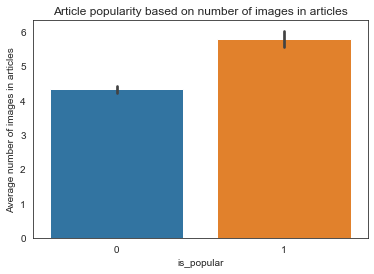

In [73]:
sns.barplot("is_popular", "num_imgs",data=df)
plt.title("Article popularity based on number of images in articles")
plt.ylabel("Average number of images in articles")

Text(0, 0.5, 'Average number of videos in articles')

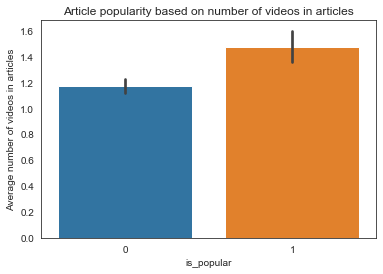

In [74]:
sns.barplot("is_popular", "num_videos",data=df)
plt.title("Article popularity based on number of videos in articles")
plt.ylabel("Average number of videos in articles")

Let's see in terms of time how the popularity of the articles looks like.

In [97]:
link_joined = pd.merge(time,y, left_index=True, right_index=True, how="left" )

melted = link_joined.melt(id_vars='is_popular', value_vars=['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',\
                                                            'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',\
                                                            'weekday_is_sunday']).reset_index()




Text(0.5, 1, 'The ratio of articles based on the published weekday')

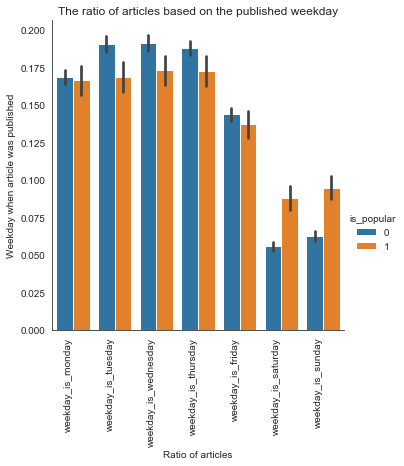

In [102]:
sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Ratio of articles")
plt.ylabel("Weekday when article was published")
plt.title("The ratio of articles based on the published weekday")

Text(0, 0.5, 'Average number of videos in articles')

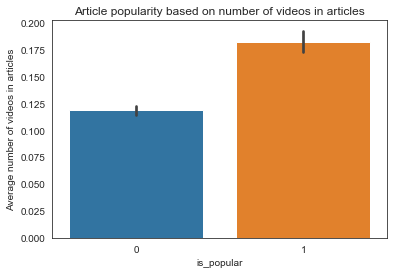

In [103]:
sns.barplot("is_popular", 'is_weekend',data=df)
plt.title("Article popularity based on number of videos in articles")
plt.ylabel("Average number of videos in articles")

Let us have a look now on the keywords category.

Text(0, 0.5, 'Average number of keywords in articles')

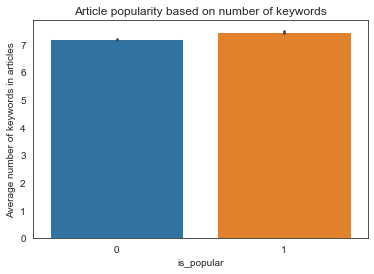

In [112]:
sns.barplot("is_popular", 'num_keywords',data=df)
plt.title("Article popularity based on number of keywords")
plt.ylabel("Average number of keywords in articles")

In [107]:
kw_joined = pd.merge(keywords,y, left_index=True, right_index=True, how="left" )

melted = kw_joined.melt(id_vars='is_popular', value_vars=['data_channel_is_lifestyle', \
                                                          'data_channel_is_entertainment', \
                                                          'data_channel_is_bus',\
                                                          'data_channel_is_socmed',\
                                                          'data_channel_is_tech',\
                                                          'data_channel_is_world']).reset_index()

Text(0.5, 1, 'The ratio of articles based on data channel')

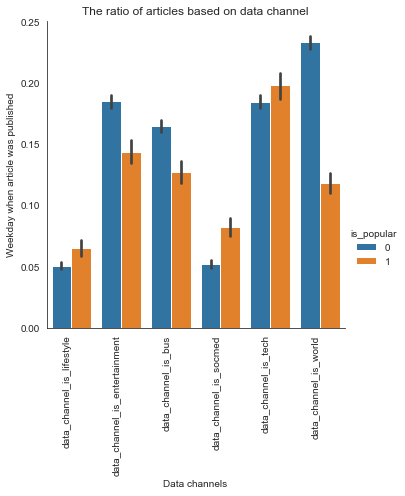

In [109]:
sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Data channels")
plt.ylabel("Weekday when article was published")
plt.title("The ratio of articles based on data channel")

In [113]:
kw_joined = pd.merge(keywords,y, left_index=True, right_index=True, how="left" )

melted = kw_joined.melt(id_vars='is_popular', value_vars=['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', \
               'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg']).reset_index()

Text(0.5, 1, 'The ratio of articles based on data channel')

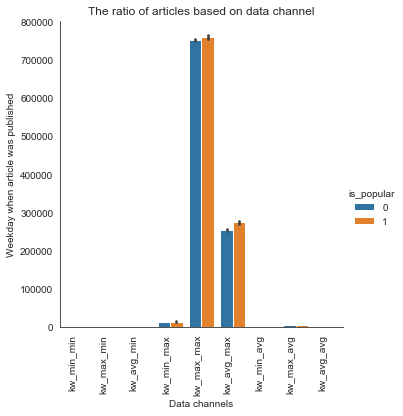

In [114]:
sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Data channels")
plt.ylabel("Weekday when article was published")
plt.title("The ratio of articles based on data channel")

As per the keywords information it seems that the data channels differ in terms of article popularity however it seems that there is no substantial difference in terms of keyword statistics.

Let's see in terms of natural language processing data how the popularity of the articles looks like.

Text(0.5, 1, 'The ratio of articles based on some NLP features')

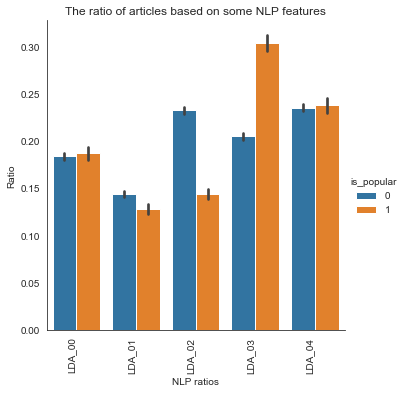

In [122]:
nlp_joined = pd.merge(nlp,y, left_index=True, right_index=True, how="left" )

melted = nlp_joined.melt(id_vars='is_popular', value_vars=['LDA_00', 'LDA_01', 'LDA_02', \
                                                          'LDA_03', 'LDA_04',]).reset_index()

sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("NLP ratios")
plt.ylabel("Ratio")
plt.title("The ratio of articles based on some NLP features")

Text(0.5, 1, 'The ratio of articles based on data channel')

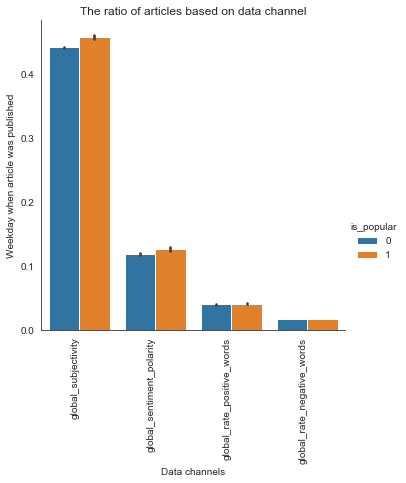

In [121]:
nlp_joined = pd.merge(nlp,y, left_index=True, right_index=True, how="left" )

melted = nlp_joined.melt(id_vars='is_popular', value_vars=['global_subjectivity',\
                                                           'global_sentiment_polarity',\
                                                           'global_rate_positive_words',\
                                                           'global_rate_negative_words',]).reset_index()

sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("NLP ratios")
plt.ylabel("Ratio")
plt.title("The ratio of articles based on some NLP features")

Text(0.5, 1, 'The ratio of articles based on some NLP features')

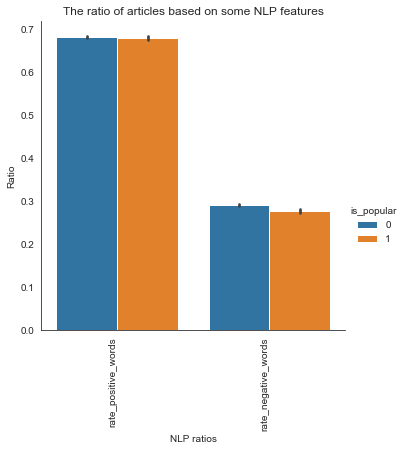

In [123]:
nlp_joined = pd.merge(nlp,y, left_index=True, right_index=True, how="left" )

melted = nlp_joined.melt(id_vars='is_popular', value_vars=['rate_positive_words', \
                                                           'rate_negative_words']).reset_index()

sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("NLP ratios")
plt.ylabel("Ratio")
plt.title("The ratio of articles based on some NLP features")

Text(0.5, 1, 'The ratio of articles based on some NLP features')

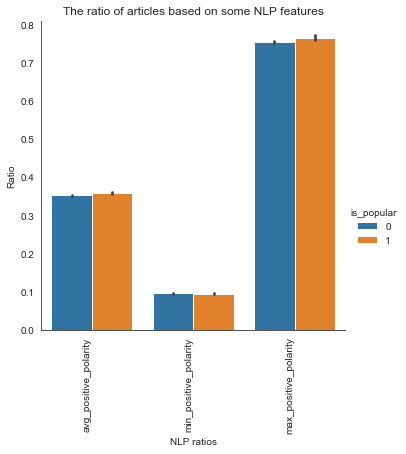

In [124]:
nlp_joined = pd.merge(nlp,y, left_index=True, right_index=True, how="left" )

melted = nlp_joined.melt(id_vars='is_popular', value_vars=['avg_positive_polarity', \
                                                           'min_positive_polarity',\
                                                           'max_positive_polarity']).reset_index()

sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("NLP ratios")
plt.ylabel("Ratio")
plt.title("The ratio of articles based on some NLP features")

Text(0.5, 1, 'The ratio of articles based on some NLP features')

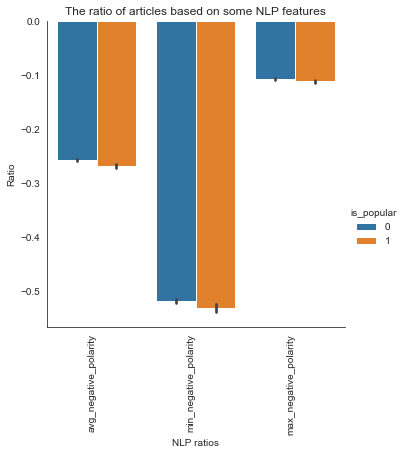

In [127]:
nlp_joined = pd.merge(nlp,y, left_index=True, right_index=True, how="left" )

melted = nlp_joined.melt(id_vars='is_popular', value_vars=['avg_negative_polarity',\
                                                           'min_negative_polarity',\
                                                           'max_negative_polarity',]).reset_index()


sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("NLP ratios")
plt.ylabel("Ratio")
plt.title("The ratio of articles based on some NLP features")

Text(0.5, 1, 'The ratio of articles based on some NLP features')

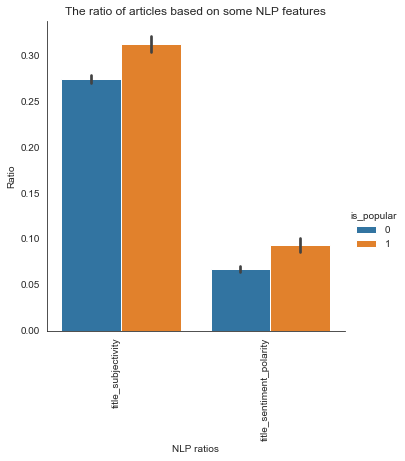

In [128]:
nlp_joined = pd.merge(nlp,y, left_index=True, right_index=True, how="left" )

melted = nlp_joined.melt(id_vars='is_popular', value_vars=['title_subjectivity',\
                                                           'title_sentiment_polarity']).reset_index()

sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("NLP ratios")
plt.ylabel("Ratio")
plt.title("The ratio of articles based on some NLP features")

Text(0.5, 1, 'The ratio of articles based on some NLP features')

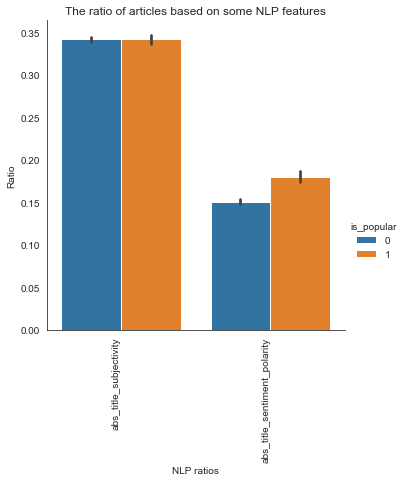

In [129]:
nlp_joined = pd.merge(nlp,y, left_index=True, right_index=True, how="left" )

melted = nlp_joined.melt(id_vars='is_popular', value_vars=['abs_title_subjectivity', \
                                                           'abs_title_sentiment_polarity']).reset_index()

sns.catplot(data=melted, x="variable", y="value",hue="is_popular", kind="bar")
plt.xticks(rotation=90, ha="right")
plt.xlabel("NLP ratios")
plt.ylabel("Ratio")
plt.title("The ratio of articles based on some NLP features")

### Feature engineering ###

#### Creating new features ####

Creating new features from unique tokens and tokens content a references.

In [687]:
df['unique_x_tokens'] = df['n_tokens_content'] * df['n_unique_tokens']

In [688]:
df['ref_min_max_avg'] = df['self_reference_min_shares']*df['self_reference_max_shares']*\
df['self_reference_avg_sharess']

Selecting most important features.

In [690]:
model = df[['n_tokens_title','unique_x_tokens','average_token_length','num_hrefs','num_self_hrefs',\
   'ref_min_max_avg', "weekday_is_monday", 'weekday_is_friday', 'weekday_is_friday',\
    'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_saturday', \
    'weekday_is_saturday', 'data_channel_is_entertainment', 'data_channel_is_bus',\
    'num_keywords','data_channel_is_socmed', 'data_channel_is_lifestyle',\
    'data_channel_is_tech','data_channel_is_world', "LDA_01", "LDA_02", "LDA_03",\
    "global_subjectivity", "min_negative_polarity", "title_subjectivity", \
    "title_sentiment_polarity", 'abs_title_sentiment_polarity']]

In [194]:
kws = df[['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',\
    'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg']]

Checking the optimal PCA components in case of keywords and NLP features.

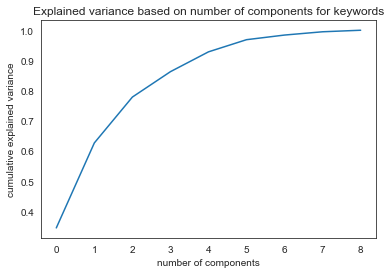

In [201]:
sc = StandardScaler()

kws_sc = sc.fit_transform(kws)

pca=PCA().fit(kws_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("Explained variance based on number of components for keywords")
plt.show()

In [205]:
nlps = df[['LDA_00', 'LDA_04', 'global_sentiment_polarity', 'global_rate_positive_words', \
'global_rate_negative_words','rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',\
'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'max_negative_polarity',\
'abs_title_subjectivity']]

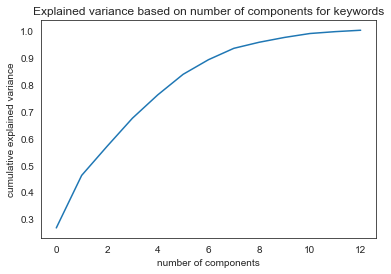

In [206]:
sc = StandardScaler()

nlps_sc = sc.fit_transform(nlps)

pca=PCA().fit(nlps_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("Explained variance based on number of components for keywords")
plt.show()

### Linear model ###

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [610]:
os.chdir("c:\\Lori\\Suil\\DA_3\\Vizsga")
df = pd.read_csv("train.csv")

For the linear model I added the previously selected features and 5 PCA components from keywords and NLP features.

In [692]:
X=df.copy()
y=df["is_popular"].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

X_train = pd.DataFrame(X_train_scaled, columns=list(df.columns))
X_train.drop(columns=["is_popular", 'article_id'],axis=1, inplace=True)

X_test = pd.DataFrame(X_test_scaled, columns=list(df.columns))
X_test.drop(columns=["is_popular", 'article_id'],axis=1, inplace=True)



pca1_train = X_train[['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',\
    'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg']]

pca1_test = X_test[['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',\
    'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg','kw_avg_avg']]

pca=PCA(n_components=5)

principalComponents_train_1 = pca.fit_transform(pca1_train)

principalDf_train_1 = pd.DataFrame(data = principalComponents_train_1,\
                           columns = ['pca_kws_1', 'pca_kws_2', 'pca_kws_3', 'pca_kws_4',\
                                      'pca_kws_5'])

principalComponents_test_1 = pca.transform(pca1_test)
principalDf_test_1 = pd.DataFrame(data = principalComponents_test_1,\
                           columns = ['pca_kws_1', 'pca_kws_2', 'pca_kws_3', 'pca_kws_4',\
                                      'pca_kws_5'])



pca2_train = X_train[['LDA_00', 'LDA_04', 'global_sentiment_polarity', 'global_rate_positive_words', \
'global_rate_negative_words','rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',\
'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'max_negative_polarity',\
'abs_title_subjectivity']]

pca2_test = X_test[['LDA_00', 'LDA_04', 'global_sentiment_polarity', 'global_rate_positive_words', \
'global_rate_negative_words','rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',\
'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'max_negative_polarity',\
'abs_title_subjectivity']]

pca=PCA(n_components=10)

principalComponents_train_2 = pca.fit_transform(pca2_train)

principalDf_train_2 = pd.DataFrame(data = principalComponents_train_2,\
                            columns = ['pca_nlp_1', 'pca_nlp_2', 'pca_nlp_3', 'pca_nlp_4',\
                                       'pca_nlp_5','pca_nlp_6','pca_nlp_7','pca_nlp_8',\
                                      'pca_nlp_9','pca_nlp_10'])

principalComponents_test_2 = pca.transform(pca2_test)

principalDf_test_2 = pd.DataFrame(data = principalComponents_test_2,\
                            columns = ['pca_nlp_1', 'pca_nlp_2', 'pca_nlp_3', 'pca_nlp_4',\
                                       'pca_nlp_5','pca_nlp_6','pca_nlp_7','pca_nlp_8',\
                                      'pca_nlp_9','pca_nlp_10'])

X_train = X_train[['n_tokens_title','unique_x_tokens','average_token_length','num_hrefs','num_self_hrefs',\
   'ref_min_max_avg', "weekday_is_monday", 'weekday_is_friday', 'weekday_is_friday',\
    'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_saturday', \
    'weekday_is_saturday', 'data_channel_is_entertainment', 'data_channel_is_bus',\
    'num_keywords','data_channel_is_socmed', 'data_channel_is_lifestyle',\
    'data_channel_is_tech','data_channel_is_world', "LDA_01", "LDA_02", "LDA_03",\
    "global_subjectivity", "min_negative_polarity", "title_subjectivity", \
    "title_sentiment_polarity", 'abs_title_sentiment_polarity']]

X_test = X_test[['n_tokens_title','unique_x_tokens','average_token_length','num_hrefs','num_self_hrefs',\
   'ref_min_max_avg', "weekday_is_monday", 'weekday_is_friday', 'weekday_is_friday',\
    'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_saturday', \
    'weekday_is_saturday', 'data_channel_is_entertainment', 'data_channel_is_bus',\
    'num_keywords','data_channel_is_socmed', 'data_channel_is_lifestyle',\
    'data_channel_is_tech','data_channel_is_world', "LDA_01", "LDA_02", "LDA_03",\
    "global_subjectivity", "min_negative_polarity", "title_subjectivity", \
    "title_sentiment_polarity", 'abs_title_sentiment_polarity']]


X_train = pd.concat([X_train,principalDf_train_1,principalDf_train_2], axis=1)
X_test = pd.concat([X_test,principalDf_test_1,principalDf_test_2], axis=1)

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

log_reg_pred = log_reg.predict(X_test)

print(roc_auc_score(y_test, log_reg_pred))

confusion_matrix(y_test,log_reg_pred)

0.5127319247201798


array([[4441,   17],
       [1061,   32]], dtype=int64)

Let's take a look if the linar model on full featureset gives better results than the previous model (with preselected features and PCA components).

In [612]:
X=df.drop(columns=["is_popular", "article_id"])
y=df["is_popular"].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)


log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

log_reg_pred = log_reg.predict(X_test_scaled)

print(roc_auc_score(y_test, log_reg_pred))

confusion_matrix(y_test,log_reg_pred)

0.5219869539715397


array([[4393,   65],
       [1029,   64]], dtype=int64)

Comparing the full feature models with the selected models we can see that leaving all the features in the dataset produces better result than the model with feature engineering.

In [676]:
pca_comps = 35


X=df.drop(columns=["is_popular", "article_id"])
y=df["is_popular"].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

X_train_df = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_df = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

pca=PCA(n_components=pca_comps)

principalComponents_train = pca.fit_transform(X_train_scaled)
principalComponents_test = pca.transform(X_test_scaled)


my_list = [("pca_" + str(x)) for x in range(pca_comps)]

principalDf_train = pd.DataFrame(data = principalComponents_train,\
                            columns = my_list)

principalDf_test = pd.DataFrame(data = principalComponents_test,\
                            columns = my_list)


X_train = pd.concat([X_train_df,principalDf_train], axis=1)
X_test = pd.concat([X_test_df,principalDf_test], axis=1)

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

log_reg_pred = log_reg.predict(X_test)

print(roc_auc_score(y_test, log_reg_pred))

confusion_matrix(y_test,log_reg_pred)

0.5241444290248685


array([[4400,   58],
       [1026,   67]], dtype=int64)

As a next step I tried having all the features and adding 35 PCA components and 20 SVD components from all the features.

In [533]:
from sklearn.linear_model import LogisticRegressionCV

In [702]:
pca_comps = 35
tsvd_comps = 20


X=df.drop(columns=["is_popular", "article_id"])
y=df["is_popular"].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

X_train_df = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_df = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

pca=PCA(n_components=pca_comps)

principalComponents_train = pca.fit_transform(X_train_df)
principalComponents_test = pca.transform(X_test_df)


pca_list = [("pca_" + str(x)) for x in range(pca_comps)]
tsvd_list = [("tsvd_" + str(x)) for x in range(tsvd_comps)]

principalDf_train = pd.DataFrame(data = principalComponents_train,\
                            columns = pca_list)

principalDf_test = pd.DataFrame(data = principalComponents_test,\
                            columns = pca_list)

tsvd = TruncatedSVD(n_components=tsvd_comps)

tsvd_train = tsvd.fit_transform(X_train_df)
tsvd_test = tsvd.transform(X_test_df)

tsvd_df_train = pd.DataFrame(data = tsvd_train,\
                            columns = tsvd_list)

tsvd_df_test = pd.DataFrame(data = tsvd_test,\
                            columns = tsvd_list)

X_train = pd.concat([X_train_df,principalDf_train,tsvd_df_train ], axis=1)
X_test = pd.concat([X_test_df,principalDf_test,tsvd_df_test ], axis=1)


log_reg = LogisticRegressionCV(cv=10, random_state=42)

log_reg.fit(X_train,y_train)

log_reg_pred = log_reg.predict(X_test)

print(roc_auc_score(y_test, log_reg_pred))

confusion_matrix(y_test,log_reg_pred)

0.5208565499198169


array([[4387,   71],
       [1030,   63]], dtype=int64)

Adding 35 PCA and 20 SVD components to the model seems to improve the model therefore I will go on with this setting.

### Random Forest model ###

#### Vanilla Random Forest ####

Let's try Random Forest model.

In [537]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [615]:

randfor = RandomForestClassifier()

scores = cross_val_score(randfor, X, y, cv=5, scoring='roc_auc')

print(scores.mean())


0.696769799104801


As it seems the vanilla random forest produces lot better results than the logistic regression. Let's make some hyperparameter tuning with randomized search and see if we can get better results.


In [616]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(2, 50, num = 5)]
#max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 14, 26, 38, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [551]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, scoring="roc_auc",\
                               cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 77.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [553]:
rf_random.best_score_

0.7124419983610357

In [554]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [619]:
randfor = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


randfor.fit(X_train,y_train)

#scores = cross_val_score(randfor, X, y, cv=5, scoring='roc_auc')

print(scores.mean())


0.7139563466194488


Hyperparameter tuned Random Forest produces a better score than vanilla Random Forest.

## Gradient Boosting ##

As a next step I will try gradient boosting using sklearn's gradient boosting classifier.

In [696]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV 

I will get right away to hyperparameter tuning of the model using cross validated grid search. As a first step I will make a grid search on the number of estimators.

In [560]:
param_test1 = {'n_estimators':range(20,1200,50)}

gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,\
                                               min_samples_leaf=50,max_depth=8,max_features='sqrt',\
                                               subsample=0.8,random_state=10)


gradient_boost_1 = GridSearchCV(estimator = gradient_boosting,\
                                param_grid = param_test1, scoring='roc_auc',n_jobs=-1,\
                                cv=5, verbose=1)

gradient_boost_1.fit(X_train,y_train)

gradient_boost_1.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 17.3min finished
C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



0.7067196788812062

In [562]:
gradient_boost_1.best_params_

{'n_estimators': 70}

***

In the second step of the hyperparameter tuning I will be searching for the optimal max depth and min samples split hyperparameters.

In [567]:
param_test2 = {'max_depth':range(4,16,2), 'min_samples_split':range(200,1001,200)}


gradient_boosting = GradientBoostingClassifier(n_estimators = 70, learning_rate=0.1,\
                                               min_samples_leaf=50,max_features='sqrt',\
                                               subsample=0.8,random_state=10)


gradient_boost_2 = GridSearchCV(estimator = gradient_boosting,\
                                param_grid = param_test2,\
                                scoring='roc_auc',n_jobs=-1,\
                                cv=5, verbose=4)

gradient_boost_2.fit(X_train,y_train)

gradient_boost_2.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.7min finished


0.7084439237152835

In [568]:
gradient_boost_2.best_params_

{'max_depth': 4, 'min_samples_split': 400}

***

In the 3rd step I search for the optimale min samples leaf hyperparameter.

In [576]:
param_test3 = {'min_samples_leaf':range(40,101,10)}


gradient_boosting = GradientBoostingClassifier(n_estimators = 70, max_depth=4,min_samples_split=400,\
                                               learning_rate=0.1, max_features='sqrt',\
                                               subsample=0.8,random_state=10)


gradient_boost_3 = GridSearchCV(estimator = gradient_boosting,\
                                param_grid = param_test3,\
                                scoring='roc_auc',n_jobs=-1,\
                                cv=5, verbose=4)

gradient_boost_3.fit(X_train,y_train)

gradient_boost_3.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  29 out of  35 | elapsed:   18.2s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   21.4s finished


0.7098665434807182

In [578]:
gradient_boost_3.best_params_

{'min_samples_leaf': 100}

***

Parameter tuning stage 4: fitting the max features hyperparameter

In [580]:
param_test4 = {'max_features':range(80,118,4)}


gradient_boosting = GradientBoostingClassifier(n_estimators = 70, max_depth=4,min_samples_split=400,\
                                               min_samples_leaf = 100,learning_rate=0.1,\
                                               subsample=0.8,random_state=10)


gradient_boost_4 = GridSearchCV(estimator = gradient_boosting,\
                                param_grid = param_test4,\
                                scoring='roc_auc',n_jobs=-1,\
                                cv=5, verbose=4)

gradient_boost_4.fit(X_train,y_train)

gradient_boost_4.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:  4.0min remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished


0.7113563389547654

In [583]:
gradient_boost_4.best_params_

{'max_features': 100}

***

Parameter tuning stage 5: fitting the subsample hyperparameter

In [584]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}


gradient_boosting = GradientBoostingClassifier(n_estimators = 70, max_depth=4,min_samples_split=400,\
                                               min_samples_leaf = 100,learning_rate=0.1,\
                                               max_features=100,random_state=10)


gradient_boost_5 = GridSearchCV(estimator = gradient_boosting,\
                                param_grid = param_test5,\
                                scoring='roc_auc',n_jobs=-1,\
                                cv=5, verbose=4)

gradient_boost_5.fit(X_train,y_train)

gradient_boost_5.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.9min remaining:   35.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


0.7113563389547654

In [585]:
gradient_boost_5.best_params_

{'subsample': 0.8}

***

Parameter tuning stage 6: decreasing learning rate to 0.05 and increasing trees to 140

In [589]:
gradient_boosting = GradientBoostingClassifier(n_estimators = 140, max_depth=4,min_samples_split=400,\
                                               min_samples_leaf = 100,learning_rate=0.05,\
                                               max_features=100,random_state=10,\
                                              subsample=0.8)


#gradient_boosting.fit(X_train,y_train)

scores = cross_val_score(gradient_boosting, X, y, cv=5, scoring='roc_auc')

print(scores.mean())



0.7152186122604246


***

Parameter tuning stage 7: decreasing learning rate to 0.01 and increasing trees to 700

In [682]:

gradient_boosting = GradientBoostingClassifier(n_estimators = 700, max_depth=4,min_samples_split=400,\
                                               min_samples_leaf = 100,learning_rate=0.01,\
                                               max_features=93,random_state=10,\
                                              subsample=0.8)


gradient_boosting.fit(X_train,y_train)

scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='roc_auc')

print(scores.mean())

0.7167894468985639


***

Parameter tuning stage 8: decreasing learning rate to 0.005 and increasing trees to 1400

In [703]:

gradient_boosting = GradientBoostingClassifier(n_estimators = 1400, max_depth=4,min_samples_split=400,\
                                               min_samples_leaf = 100,learning_rate=0.005,\
                                               max_features=100,random_state=10,\
                                              subsample=0.8)


#gradient_boosting.fit(X_train,y_train)

scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='roc_auc')

print(scores.mean())

0.7165194220162163


***

## TESTING ##

In [ ]:
os.chdir("c:\\Lori\\Suil\\DA_3\\Vizsga")
df_test = pd.read_csv("test.csv")

pca_comps = 35

X_test = df_test.drop(columns=["article_id"])

X_test_scaled= scaler.transform(X_test)

X_test_df = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

pca_list = [("pca_" + str(x)) for x in range(pca_comps)]
tsvd_list = [("tsvd_" + str(x)) for x in range(tsvd_comps)]

principalComponents_test = pca.transform(X_test_df)

principalDf_test = pd.DataFrame(data = principalComponents_test,\
                            columns = pca_list)

tsvd_test = tsvd.transform(X_test_df)

tsvd_df_test = pd.DataFrame(data = tsvd_test,\
                            columns = tsvd_list)


X_test = pd.concat([X_test_df,principalDf_test], axis=1)

test_predictions = gradient_boosting.predict_proba(X_test)
probas = test_predictions[:,1]


In [ ]:
submission = pd.read_csv("test.csv")
ids = submission.article_id.values
output = pd.DataFrame({'article_id': ids, 'score': probas})
output.to_csv("lorant_submission_v24.csv", index=False)

***

## Final thoughts ##

As we can see the hyperparameter tuned Gradient Boosting classifier performed better (0.7168), than the hyperparameter tuned Random Forest model (0.7139). Compared to the linear logistic model these both models outperform it. 

I will create the neural network model in a separate notebook as the environment for this notebook does not support the neural network packages.